# Project: Predictive Model + Actionable Agent for Employee Churn Risk
  ##### By Naman Soni


In [ ]:
%pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import streamlit as st

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Cog_Culture_Assignment_UserCase2(NAMAN SONI 21CSU438)/Project_Risk_Agent/employee_churn.csv')

# df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## Data Cleaning

In [ ]:
y = data.status
y

,status
0,Left
1,Employed
2,Employed
3,Employed
4,Employed
...,...
14244,Employed
14245,Employed
14246,Left
14247,Employed


In [ ]:
features = [
            'avg_monthly_hrs','filed_complaint', 'last_evaluation',
            'n_projects', 'recently_promoted', 'salary',
            'satisfaction','tenure'
           ]
#Features have been removed to get better results : Department

In [ ]:
X = data[features]
X

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure
0,221,NaN,0.932868,4,NaN,low,0.829896,5.0
1,232,NaN,NaN,3,NaN,low,0.834544,2.0
2,184,NaN,0.788830,3,NaN,medium,0.834988,3.0
3,206,NaN,0.575688,4,NaN,low,0.424764,2.0
4,249,NaN,0.845217,3,NaN,low,0.779043,3.0
...,...,...,...,...,...,...,...,...
14244,178,NaN,0.735865,5,NaN,low,0.263282,5.0
14245,257,NaN,0.638604,3,NaN,low,0.868209,2.0
14246,232,1.0,0.847623,5,NaN,medium,0.898917,5.0
14247,130,NaN,0.757184,4,NaN,medium,0.641304,3.0


In [ ]:
X = pd.get_dummies(X)
X = X.fillna(0)
X

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,5.0,False,True,False
1,232,0.0,0.000000,3,0.0,0.834544,2.0,False,True,False
2,184,0.0,0.788830,3,0.0,0.834988,3.0,False,False,True
3,206,0.0,0.575688,4,0.0,0.424764,2.0,False,True,False
4,249,0.0,0.845217,3,0.0,0.779043,3.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...
14244,178,0.0,0.735865,5,0.0,0.263282,5.0,False,True,False
14245,257,0.0,0.638604,3,0.0,0.868209,2.0,False,True,False
14246,232,1.0,0.847623,5,0.0,0.898917,5.0,False,False,True
14247,130,0.0,0.757184,4,0.0,0.641304,3.0,False,False,True


In [ ]:
data.isnull().sum()

,0
avg_monthly_hrs,0
department,709
filed_complaint,12191
last_evaluation,1532
n_projects,0
recently_promoted,13949
salary,0
satisfaction,181
status,0
tenure,181


In [ ]:
100/len(data)

0.007018036353428311

In [ ]:
data[data['tenure'].isnull()]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
24,125,temp,NaN,NaN,2,NaN,medium,NaN,Employed,NaN
28,67,temp,NaN,NaN,1,NaN,low,NaN,Employed,NaN
44,70,temp,NaN,NaN,3,NaN,low,NaN,Employed,NaN
252,81,temp,NaN,NaN,1,NaN,low,NaN,Employed,NaN
291,71,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
...,...,...,...,...,...,...,...,...,...,...
13850,95,temp,NaN,NaN,2,NaN,low,NaN,Employed,NaN
14083,123,temp,NaN,NaN,1,NaN,medium,NaN,Employed,NaN
14105,81,temp,1.0,NaN,1,NaN,medium,NaN,Employed,NaN
14126,132,temp,NaN,NaN,2,NaN,medium,NaN,Left,NaN


In [ ]:
data = data.dropna(subset=['tenure'])


data.filed_complaint.fillna(0, inplace=True)
data.recently_promoted.fillna(0, inplace=True)
data['last_evaluation_missing'] = data.last_evaluation.isnull().astype(int)
data.last_evaluation.fillna(0, inplace=True)

data['department'].fillna('Missing', inplace=True)

data.department.replace('information_technology', 'IT', inplace=True)

/tmp/ipython-input-13-2137474353.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.filed_complaint.fillna(0, inplace=True)
/tmp/ipython-input-13-2137474353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.filed_complaint.fillna(0, inplace=True)
/tmp/ipython-input-13-2137474353.py:5: FutureWarning: A value is trying to be set on 

In [ ]:
data = pd.get_dummies(data, columns=['salary'])

In [ ]:
data.isnull().sum()

,0
avg_monthly_hrs,0
department,0
filed_complaint,0
last_evaluation,0
n_projects,0
recently_promoted,0
satisfaction,0
status,0
tenure,0
last_evaluation_missing,0


## Over Sampling

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [ ]:
y.value_counts()

,count
status,
Left,10857
Employed,10857


### stratified random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# XGBoost

In [ ]:
# Define the grid of hyperparameters to search over
param_grid = {'n_estimators': [100, 500],
              'learning_rate' : [0.05],
              'max_depth' : [3, 5]
              }

# Initialize the random forest classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)

# Create the grid search object
from sklearn.model_selection import GridSearchCV
grid_gb = GridSearchCV(estimator=gb,
                           param_grid=param_grid,
                           cv=5, n_jobs=-1,
                           verbose=1)

# Fit the grid search to the training data
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [3, 5],
                         'n_estimators': [100, 500]},
             verbose=1)

In [ ]:
grid_gb.best_estimator_.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(" Results from Grid Search " )

print("\n The best score across ALL searched params:\n",grid_gb.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gb.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.9815208227200621

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
clf = GradientBoostingClassifier(random_state= 1)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
# fit classifier on train data
clf = gb.fit(X_train, y_train)
# predict on test data
y_pred = clf.predict(X_test)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Employed       0.94      0.96      0.95      2171
        Left       0.96      0.93      0.95      2172

    accuracy                           0.95      4343
   macro avg       0.95      0.95      0.95      4343
weighted avg       0.95      0.95      0.95      4343



In [ ]:
# obtain predictions
from sklearn.metrics import confusion_matrix, accuracy_score
pred = gb.predict(X_test)
# confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
# accuracy score
print('Accuracy:', accuracy_score(y_test, pred))

[[2081   90]
 [ 144 2028]]
Accuracy: 0.9461201934146903


In [ ]:
y = pd.get_dummies(y)
y

,Employed,Left
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
21709,False,True
21710,False,True
21711,False,True
21712,False,True


1. satisfaction (0.355534)
2. tenure (0.343815)
3. avg_monthly_hrs (0.118820)
4. n_projects (0.115617)
5. last_evaluation (0.057113)
6. filed_complaint (0.005143)
7. salary_low (0.001949)
8. salary_high (0.001933)
9. recently_promoted (0.000075)
10. salary_medium (0.000001)


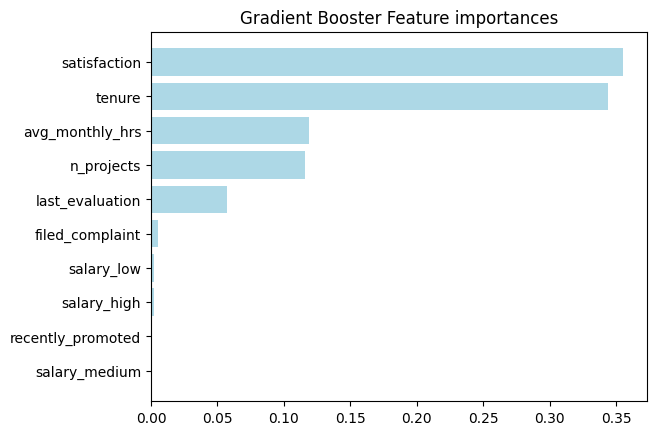

In [ ]:
coef = gb.feature_importances_
ind = np.argsort(-coef)
for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[ind[i]], coef[ind[i]]))
x = range(X_train.shape[1])
y_coeff = coef[ind][:X_train.shape[1]]
plt.title("Gradient Booster Feature importances")
ax = plt.subplot()
plt.barh(x, y_coeff, color='lightblue')
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind])
plt.gca().invert_yaxis()

# Random Forest

In [ ]:
# Define the grid of hyperparameters to search over
param_grid = {'n_estimators': [100],
              'criterion': ['gini','entropy'],
              'max_depth': [None, 5],
              'min_samples_split': [2],
              'min_samples_leaf': [1, 2]}

# Initialize the random forest classifier
rf = RandomForestClassifier(random_state=1)

# Create the grid search object
grid_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5, n_jobs=-1,
                           verbose=1)

# Fit the grid search to the training data
grid_rf.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2], 'n_estimators': [100]},
             verbose=1)

In [ ]:
grid_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(" Results from Grid Search " )

print("\n The best score across ALL searched params:\n",grid_rf.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_rf.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.9913072319346596

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# fit classifier on train data
clf = rf.fit(X_train, y_train)
# predict on test data
y_pred = clf.predict(X_test)


In [ ]:
clf = RandomForestClassifier(random_state= 1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
# obtain predictions
pred = rf.predict(X_test)
# confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
# accuracy score
print('Accuracy:', accuracy_score(y_test, pred))

[[2152   19]
 [  13 2159]]
Accuracy: 0.992631821321667


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Employed       0.99      0.99      0.99      2171
        Left       0.99      0.99      0.99      2172

    accuracy                           0.99      4343
   macro avg       0.99      0.99      0.99      4343
weighted avg       0.99      0.99      0.99      4343



1. satisfaction (0.246134)
2. tenure (0.244049)
3. avg_monthly_hrs (0.192174)
4. n_projects (0.165800)
5. last_evaluation (0.121342)
6. filed_complaint (0.012896)
7. salary_low (0.007201)
8. salary_high (0.004734)
9. salary_medium (0.003681)
10. recently_promoted (0.001990)


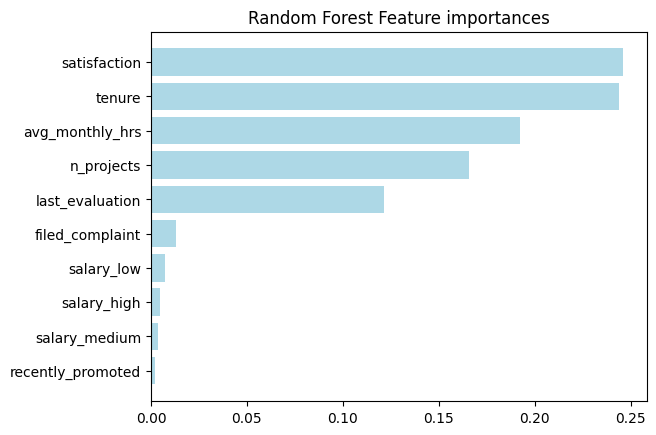

In [ ]:
coef = rf.feature_importances_
ind = np.argsort(-coef)
for i in range(X_train.shape[1]):
    print("%d. %s (%f)" % (i + 1, X.columns[ind[i]], coef[ind[i]]))
x = range(X_train.shape[1])
y_coeff = coef[ind][:X_train.shape[1]]
plt.title("Random Forest Feature importances")
ax = plt.subplot()
plt.barh(x, y_coeff, color='lightblue')
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind])
plt.gca().invert_yaxis()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X= scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 2)

In [ ]:
#fit_transform
cluster_labels=model.fit_predict(scaled_X)


In [ ]:
X['Cluster'] = cluster_labels
X

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,salary_high,salary_low,salary_medium,Cluster
0,221,0.0,0.932868,4,0.0,0.829896,5.0,False,True,False,1
1,232,0.0,0.000000,3,0.0,0.834544,2.0,False,True,False,0
2,184,0.0,0.788830,3,0.0,0.834988,3.0,False,False,True,0
3,206,0.0,0.575688,4,0.0,0.424764,2.0,False,True,False,0
4,249,0.0,0.845217,3,0.0,0.779043,3.0,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...
21709,223,0.0,0.901304,5,0.0,0.873082,5.0,False,False,True,1
21710,248,0.0,0.947832,4,0.0,0.930371,5.0,False,True,False,1
21711,281,0.0,0.510781,4,0.0,0.570859,6.0,False,False,True,1
21712,141,1.0,0.462154,2,0.0,0.466326,3.0,False,True,False,0


<Axes: >

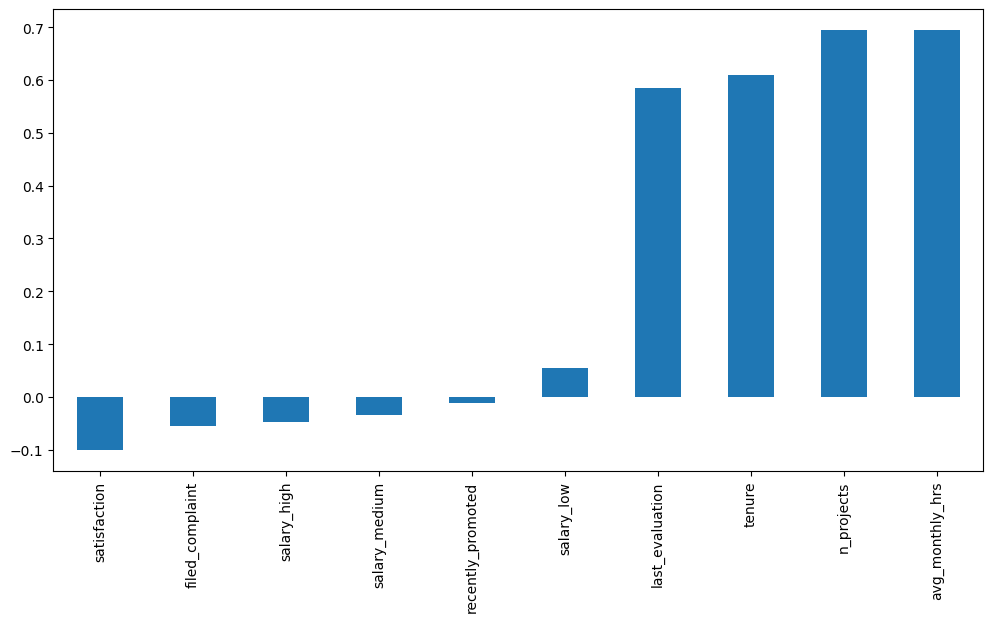

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
#now i know what features are important for seperating out all this feature data into two seperate clusters.
#you can see what features are being highly considered as part of the clusters.
#So this is just in a general idea of trying to understand how the features connect to the clusters.

In [ ]:
ssd = []

for k in range(2,10):
    model= KMeans(n_clusters=k)
    model.fit(scaled_X)

    ssd.append(model.inertia_) #SSD point to cluster center

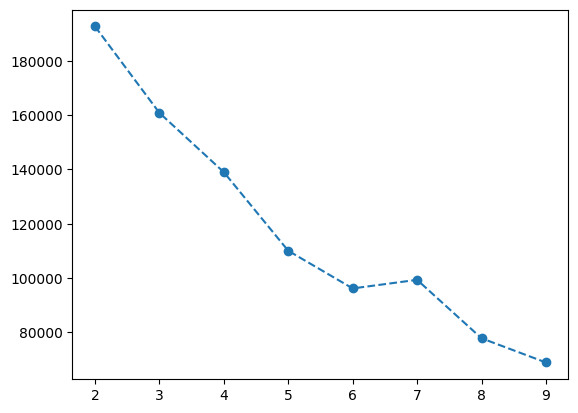

In [ ]:
plt.plot(range(2,10),ssd,'o--')

In [ ]:
pd.Series(ssd).diff()
#k = 2

,0
0,NaN
1,-31814.348233
2,-21840.124589
3,-28929.122748
4,-13862.012898
5,3168.791514
6,-21516.571087
7,-8912.661845


## Wrapper

In [ ]:
def extract_churn_predictions(model, X_test, n_samples=5):
    """
    Extracts predicted class, churn probability, and feature values
    for the given test set, to be used as input for LLM agents.

    Parameters:
    - model: Trained classifier with .predict() and .predict_proba()
    - X_test: Test features (DataFrame)
    - n_samples: Number of sample predictions to extract (default: 5)

    Returns:
    - List of dictionaries containing predictions and associated data
    """

    # Predict class and probability
    predicted_class = model.predict(X_test)
    churn_probs = model.predict_proba(X_test)[:, 1]  # Probability of class "Left"

    output = []

    # Limit to top n samples (or all if n_samples > total)
    for i in range(min(n_samples, len(X_test))):
        employee = {
            "prediction": predicted_class[i],
            "churn_probability": round(float(churn_probs[i]), 4),
            "features": X_test.iloc[i].to_dict()
        }
        output.append(employee)

    return output


In [ ]:
predictions = extract_churn_predictions(clf, X_test, n_samples=100)


In [ ]:
import json

# Your predictions from the wrapper function
predictions = extract_churn_predictions(clf, X_test, n_samples=100)

# Define your full target path
save_path = "/content/drive/MyDrive/Cog_Culture_Assignment_UserCase2(NAMAN SONI 21CSU438)/Project_Risk_Agent/churn_predictions.json"

# Save the JSON file
with open(save_path, "w") as f:
    json.dump(predictions, f, indent=4)

print(f"✅ JSON file saved at: {save_path}")


✅ JSON file saved at: /content/drive/MyDrive/Cog_Culture_Assignment_UserCase2(NAMAN SONI 21CSU438)/Project_Risk_Agent/churn_predictions.json
